## Description
We will attempt to prepare data for an Unsupervised Neural Machine Translation between English and French.  The data used will be from [ACL 2014 NINTH WORKSHOP ON STATISTICAL MACHINE TRANSLATION](http://www.statmt.org/wmt14/translation-task.html), specifically monolingual data news crawl data from 2007:

[English](http://www.statmt.org/wmt14/training-monolingual-news-crawl/news.2007.en.shuffled.gz)

[French](http://www.statmt.org/wmt14/training-monolingual-news-crawl/news.2007.fr.shuffled.gz)


### Read the English data
After unzipping to an appropriate folder, we will look at some sample data:

In [14]:
data_path = "news.2007.en.shuffled"
def display_data(file_path):
    with open(file_path, mode='r', encoding='utf-8') as f:
        count = 0
        for line in f:
            print(line)
            count += 1
            if count == 10:
                break

display_data(data_path)

Dave Aneckstein, Simmons Research, an Experian Company

They have not been charged or formally arrested.

“Iran isn’t making an atomic bomb, not at all,” Chavez said Monday.

So far, Nintendo has shipped 9.3 million units of the Wii, which was introduced last year.

It is estimated that around two million people in England under the age of 65 fall into a high-risk category making them eligible for a flu vaccine.

Flesch, who held the 36-hole lead at Reno in late July and went on to win, took the lead with a 17-foot birdie putt at the par-4 second hole.

It's as simple as that," said Wie, who will tee off in today's LPGA Samsung World Championship first round on her 18th birthday.

The Japanese-made tin robots have blocky heads and moveable arms and legs.

If they could no longer be the nominees, then they would be pundits of the first order — men with credibility on Oval Office matters by dint of once sitting in the chair themselves.

Free Challenge kits have a CD and brochure from Dr.

Then we tokenize the data.

In [15]:
def tokenizer(file_path):
    word_ind_count = {}
    with open(data_path, mode='r', encoding='utf-8') as f:
        count = 0
        idx = 0 # indexing the occurence of a word rather than reading everything at once
        for line in f:
            line = line.rstrip().split()
            for word in line:
                if word in word_ind_count:
                    word_ind_count[word][1] += 1
                    word_ind_count[word][0].append(idx)
                    idx += 1
                else:
                    word_ind_count[word] = [[idx], 1]
                    idx += 1
            count += 1
            if count == 5:
                # Displaying a portion of the dictionary, rather than showing the entire thing
                print(word_ind_count)
            if count == 50000:
                break
    return word_ind_count

word_ind_count = tokenizer(data_path)

{'Dave': [[0], 1], 'Aneckstein,': [[1], 1], 'Simmons': [[2], 1], 'Research,': [[3], 1], 'an': [[4, 18], 2], 'Experian': [[5], 1], 'Company': [[6], 1], 'They': [[7], 1], 'have': [[8], 1], 'not': [[9, 21], 2], 'been': [[10], 1], 'charged': [[11], 1], 'or': [[12], 1], 'formally': [[13], 1], 'arrested.': [[14], 1], '“Iran': [[15], 1], 'isn’t': [[16], 1], 'making': [[17, 63], 2], 'atomic': [[19], 1], 'bomb,': [[20], 1], 'at': [[22], 1], 'all,”': [[23], 1], 'Chavez': [[24], 1], 'said': [[25], 1], 'Monday.': [[26], 1], 'So': [[27], 1], 'far,': [[28], 1], 'Nintendo': [[29], 1], 'has': [[30], 1], 'shipped': [[31], 1], '9.3': [[32], 1], 'million': [[33, 49], 2], 'units': [[34], 1], 'of': [[35, 56], 2], 'the': [[36, 54], 2], 'Wii,': [[37], 1], 'which': [[38], 1], 'was': [[39], 1], 'introduced': [[40], 1], 'last': [[41], 1], 'year.': [[42], 1], 'It': [[43], 1], 'is': [[44], 1], 'estimated': [[45], 1], 'that': [[46], 1], 'around': [[47], 1], 'two': [[48], 1], 'people': [[50], 1], 'in': [[51], 1], '

Rather than constructing this type of data for our tokens, we will use existing tokenizers provided by Facebook's tokenizer ([codes_en_fr](https://dl.fbaipublicfiles.com/XLM/codes_enfr), [vocab_en_fr](https://dl.fbaipublicfiles.com/XLM/vocab_enfr)).  For now, we will work with the above constructed dictionary.

We look at the frequency of words within the first 50000 lines.

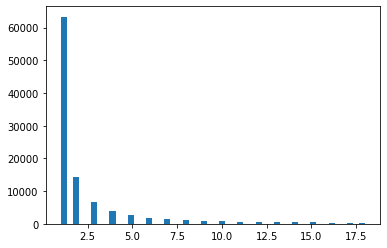

In [16]:
def freq_hist(word_dict):
    import matplotlib.pyplot as plt
    %matplotlib inline

    freqs = [v[1] for _, v in word_dict.items()]
    freqs.sort()
    N = len(freqs)
    plt.hist(freqs[int(.05*N):N-int(.05*N)], 50) # Showing the middle 95% of the frequencies
    plt.show()

freq_hist(word_ind_count)

### French data
We do the same for the French news craw data.

In [19]:
fr_data_path = "news.2007.fr.shuffled"
display_data(fr_data_path)

Ils passent tous trois le premier tour avec succès.

Il est notamment envisagé de le faire sortir des murs de l'établissement -ce qui permettrait une plus grande confidentialité- et de l'ouvrir aux jeunes non-lycéens.

Erstein : pharmacie du Centre, 15, rue Mercière.

Ce dernier est rentré à son domicile, est revenu, armé d'une masse, qu'il a utilisée pour détruire le véhicule.

Autre belle rencontre, ce jeune et talentueux Louis-Michel Liger Belair qui, comme son ami Sylvain Pitiot (au Clos de Tart), sait rendre un hommage particulièrement sensible à ses terroirs du côté de Vosnes-Romanée.

Vendredi, des cérémonies se sont déroulées à Montréal, Toronto et Vancouver.

Veillée de Noël

Tous les postes du budget spatial allemand vont connaître une hausse sensible en 2008, à commencer par la dotation annuelle du DLR qui atteint 265,56 millions (contre 241 millions en 2007).

Mundolsheim : pharmacie Lossel, 1 rue du Général Leclerc.

Pendant que les Canadiens dorment paisiblement, cependan

In [20]:
fr_word_ind_count = tokenizer(fr_data_path)

{'Dave': [[0], 1], 'Aneckstein,': [[1], 1], 'Simmons': [[2], 1], 'Research,': [[3], 1], 'an': [[4, 18], 2], 'Experian': [[5], 1], 'Company': [[6], 1], 'They': [[7], 1], 'have': [[8], 1], 'not': [[9, 21], 2], 'been': [[10], 1], 'charged': [[11], 1], 'or': [[12], 1], 'formally': [[13], 1], 'arrested.': [[14], 1], '“Iran': [[15], 1], 'isn’t': [[16], 1], 'making': [[17, 63], 2], 'atomic': [[19], 1], 'bomb,': [[20], 1], 'at': [[22], 1], 'all,”': [[23], 1], 'Chavez': [[24], 1], 'said': [[25], 1], 'Monday.': [[26], 1], 'So': [[27], 1], 'far,': [[28], 1], 'Nintendo': [[29], 1], 'has': [[30], 1], 'shipped': [[31], 1], '9.3': [[32], 1], 'million': [[33, 49], 2], 'units': [[34], 1], 'of': [[35, 56], 2], 'the': [[36, 54], 2], 'Wii,': [[37], 1], 'which': [[38], 1], 'was': [[39], 1], 'introduced': [[40], 1], 'last': [[41], 1], 'year.': [[42], 1], 'It': [[43], 1], 'is': [[44], 1], 'estimated': [[45], 1], 'that': [[46], 1], 'around': [[47], 1], 'two': [[48], 1], 'people': [[50], 1], 'in': [[51], 1], '

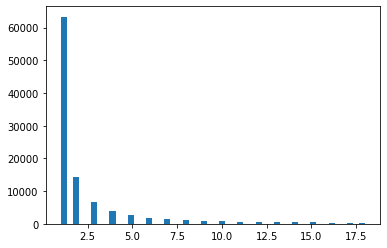

In [21]:
freq_hist(fr_word_ind_count)